## Imports

In [1]:
from astropy.table import Table
import functions as func
from astropy.time import Time
import importlib as imp
import os
import numpy as np

## Get the DBQSO catalog

In [2]:
path = os.getcwd()
file_path = os.path.join(path, "DB_QSO_S82.dat.gz")
if not os.path.exists(file_path):
    # Get the quasar catalog - it gets saved in the same directory as the notebook 
    url = "https://faculty.washington.edu/ivezic/macleod/qso_dr7/DB_QSO_S82.dat.gz"
    os.system(f'wget {url}')   

## Load the combined SDSS-ZTF-PS1 data

First, of the entire CLQSO  catalog of 40 objects, find out which quasars have the ZTF data:

In [3]:
colnames = ['dbID', 'SDSSJID', 'ra', 'dec',	'Redshift', 'log10_Lbol', 'log10_MBH', 
            'f_Edd','Delta(mag)',
            'Delta(sigma_G)', 'MedianPS1']
clqso = Table.read("CLQSO_candidates.txt", format='ascii',
                   names=colnames)

In [4]:
# find out what objects have ZTF data in thegiven directory
dr_path = os.path.join(os.getcwd(), 'ZTFDR21')
ztf_all_bands = func.get_ztf_file_list(dr_path)

# select only r-band 
ztf_r_band = [file for file in ztf_all_bands if file.__contains__("_r.")]

# get only the SDSS_JID,  i.e. J222918.25-004003.6 from file name 
ztf_r_band_sdss_jid =  [name.split('_')[0][1:] for name in ztf_r_band]

# select those CLQSO candidates with ZTF data
mask = np.in1d(clqso['SDSSJID'],ztf_r_band_sdss_jid)
clqso_with_ztf = clqso[mask]

Plot a combined ligth curve for the first CLQSO:

Based on given 005142.20+002129.0, found data for J005142.20+002129.0_ZTF_r.csv
Using provided 005142.20+002129.0
Got ZTF_filename
Got SDSS_JID
Got SDSS_dbID
Got ztf_original
Got ztf_synthetic
Got sdss
Got ps1

ps1
Unique days:7 total number of observations: 14

ztf_synthetic
Unique days:284 total number of observations: 352
ps1 single point color is #2ca02c
ztf_synthetic single point color is #9467bd
Saved as sdss_ztf_ps1_00514_combined_.png in /Users/chris/GradResearch/2023-clqso-ps1-ztf/code


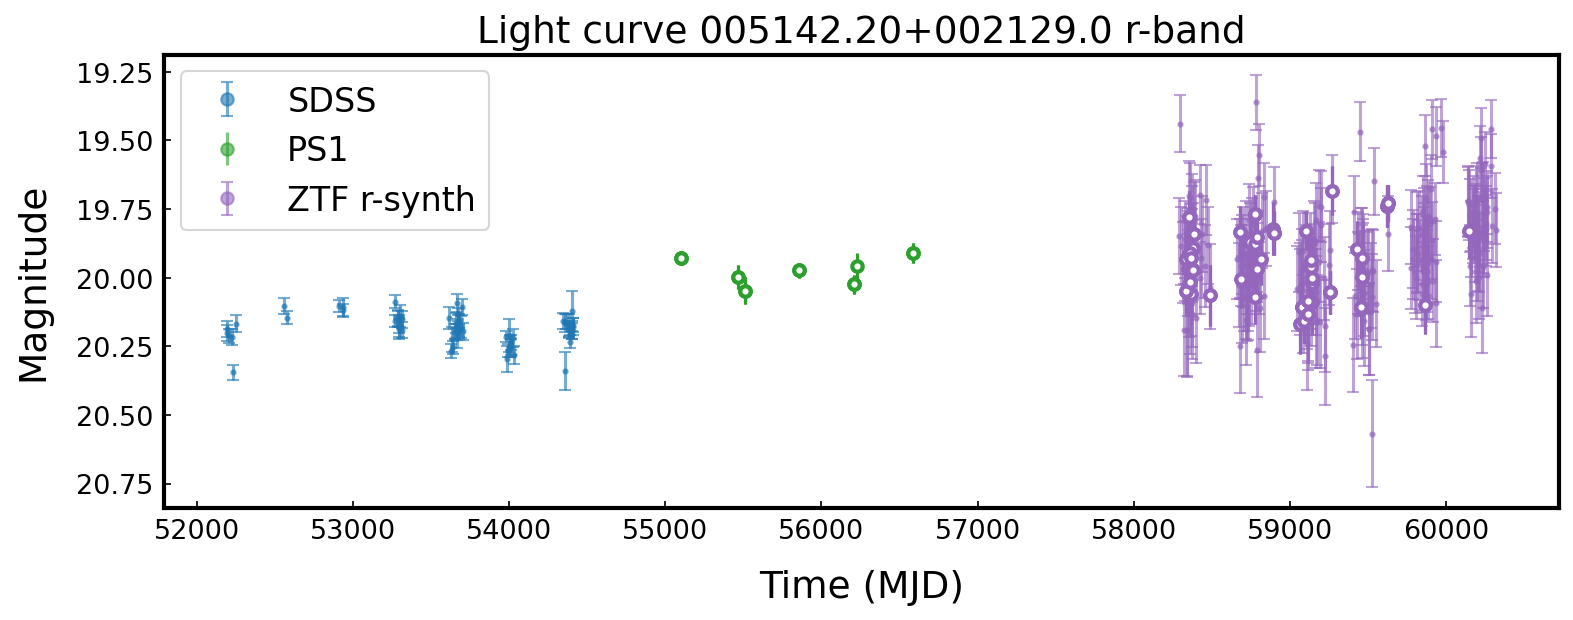

In [5]:
sdss_name = clqso_with_ztf['SDSSJID'][0]

# load the SDSS, PS1, ZTF data 
data_r_band = func.get_data_to_dict(dr_path,
                                    sdss_jid=sdss_name)
# day-average, perform sigma clipping 
avg_data_r = func.average_data(data_r_band, 
                               surveys_to_average=['ps1','ztf_synthetic'], 
                               Nsigma = 5)
# plot the data 
func.plot_averaged_data(avg_data_r, plot_flagged=False, mjds=[])



# Plot SDSS + PS1 data  only 

Plot an SDSS Stripe82 quasar, together with the PS1 data.

Assume that the SDSS S82 quasar data reside in `QSO_S82`  sub-directory, and the PS1 lightcurves in 
`PS1_DR2_detection`. Each can be changed below.  

In [6]:
sdss_dr_path = os.path.join(os.getcwd(), 'QSO_S82')
ps1_dr_path = os.path.join(os.getcwd(), 'PS1_DR2_detection')

We can select  which quasar gets plotted by the dbId.

In [7]:
qso_ps1 = Table.read('ps1_top_10_brightest_S82.csv', format='csv')
dbId = qso_ps1['target'][0]

Reading /Users/chris/GradResearch/2023-clqso-ps1-ztf/code/QSO_S82/1992659
Loaded 69 epochs in SDSS r-band

Reading 1992659_PS1_DR2_detection.csv
Loaded 19 epochs in PS1 r-band


/Users/chris/GradResearch/2023-clqso-ps1-ztf/code/functions.py:374: RuntimeWarning: invalid value encountered in log10
  return -2.5 * np.log10(flux) + 8.90


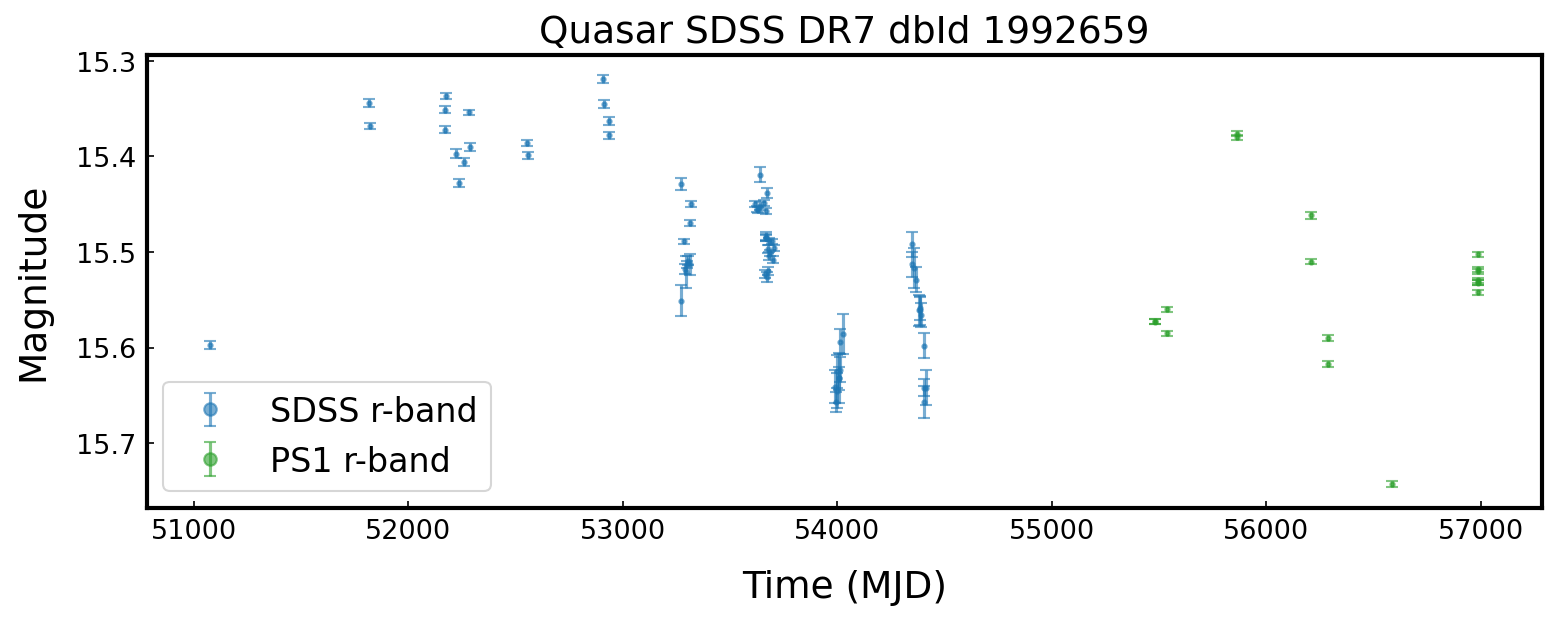

In [8]:
data = func.load_survey_data(dbId, sdss_dr_path,ps1_dr_path, filter_select='r')
func.plot_survey_data(data)

# Plot SDSS+PS1+ZTF data using original filters

Here we plot light curves without the photometric transformation that was performed above for the CLQSO candidates. This means we are using the original photometric filters - note that while SDSS and PS1 have similar r-band transmissivity, ZTF r-band includes more longer wavelengths (see `01_filter_comparison.ipynb` for filter comparison). 

In [9]:
sdss_dr_path = os.path.join(os.getcwd(), 'QSO_S82')
ps1_dr_path = os.path.join(os.getcwd(), 'PS1_DR2_detection')
ztf_dr_path = os.path.join(os.getcwd(), 'ZTFDR21')

Select which quasar gets plotted using the SDSS DR7 dbID: 

In [10]:
qso_ps1 = Table.read('ps1_top_10_brightest_S82.csv', format='csv')
dbId = qso_ps1['target'][0]

Reading /Users/chris/GradResearch/2023-clqso-ps1-ztf/code/QSO_S82/1992659
Loaded 69 epochs in SDSS r-band

Reading 1992659_PS1_DR2_detection.csv
Loaded 19 epochs in PS1 r-band

Reading 1992659_ZTF_r.csv
Loaded 453 epochs in ZTF r-band


/Users/chris/GradResearch/2023-clqso-ps1-ztf/code/functions.py:374: RuntimeWarning: invalid value encountered in log10
  return -2.5 * np.log10(flux) + 8.90


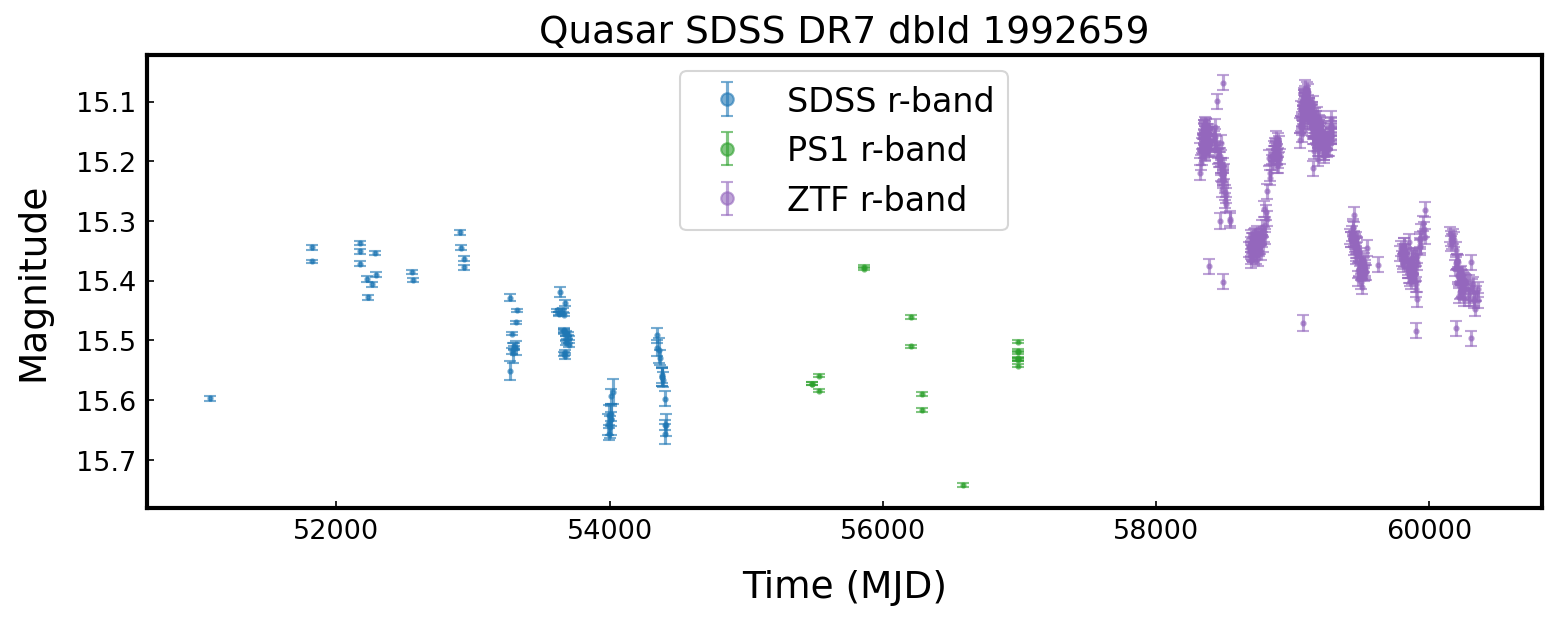

In [11]:
data = func.load_survey_data(dbId, sdss_dr_path,ps1_dr_path, 
                                   ztf_dr_path=ztf_dr_path, filter_select='r')
func.plot_survey_data(data)